# Support Vector Machine

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score

# Dataset loading
dataset = np.load('dataset4f1.npy')
labels = np.load('labels4f1.npy')

In [3]:
dataset.shape

(1000, 4)

In [4]:
print(dataset[33,1])

699.0


In [5]:
# Dataset rescaling and training/validation split

scaler = MinMaxScaler().fit(dataset) #normalizzazione
dataset = scaler.transform(dataset)
training_set, validation_set, training_label, validation_label = train_test_split(dataset, labels, train_size = 0.7)

In [6]:
# SVM definition and training
svm_classifier = SVC(kernel='sigmoid', C=1, gamma=1, coef0=1)
svm_classifier.fit(training_set, training_label)

SVC(C=1, coef0=1, gamma=1, kernel='sigmoid')

In [7]:
from sklearn.model_selection import GridSearchCV 

In [8]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000],"coef0": [0.01, 0.1, 1, 10], "gamma": [0.01, 0.1, 1]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring="accuracy", verbose = 0)
grid_search.fit(training_set, training_label)
best_clf = grid_search.best_estimator_

In [9]:
print(best_clf)

SVC(C=0.1, coef0=0.01, gamma=1, kernel='sigmoid')


In [10]:
y_pred = svm_classifier.predict(validation_set)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(validation_label, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.67%


# Quantum Support Vector Machine

In [13]:
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import FidelityStatevectorKernel
from qiskit.circuit import QuantumCircuit
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
#from qiskit.circuit.library import PauliFeatureMap

nb_features = dataset.shape[1]
x = ParameterVector("x", length=nb_features)
backend = Aer.get_backend("statevector_simulator")

#fmap= ZZFeatureMap(2, reps=1)
#fmap = QuantumCircuit(2)
#fmap.h(0)
#fmap.h(1)
#fmap.rz(x[0], 0)
#fmap.rz(x[1], 1)
fmap= ZFeatureMap(4, reps=1)
#fmap= PauliFeatureMap(2, reps=1)

qker = FidelityStatevectorKernel(feature_map=fmap) #creo quantum kernel associato alla fmap feature map
qker_matrix = qker.evaluate(x_vec=training_set)

qsvm_classifier = SVC(kernel="precomputed")


In [14]:
qker_matrix_training= qker.evaluate(x_vec = training_set)
qsvm_classifier.fit(qker_matrix_training, training_label)

SVC(kernel='precomputed')

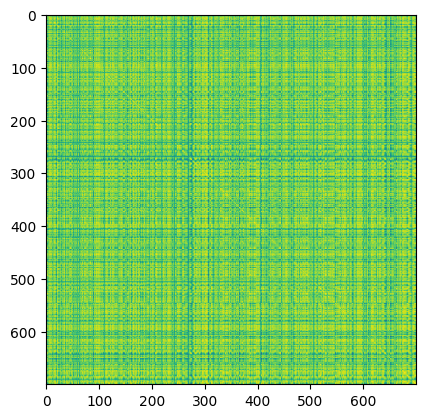

In [15]:
import matplotlib.pyplot as plt
plt.imshow(qker_matrix)

In [16]:
print(qker_matrix[122,122])

1.0


In [17]:
qker_matrix_val= qker.evaluate(x_vec=validation_set, y_vec= training_set)

accuratezza:

In [18]:
qsvm_classifier.score(qker_matrix_val, validation_label) #accuratezza

0.7966666666666666

In [19]:
print(fmap.decompose())

     ┌───┐┌─────────────┐
q_0: ┤ H ├┤ P(2.0*x[0]) ├
     ├───┤├─────────────┤
q_1: ┤ H ├┤ P(2.0*x[1]) ├
     ├───┤├─────────────┤
q_2: ┤ H ├┤ P(2.0*x[2]) ├
     ├───┤├─────────────┤
q_3: ┤ H ├┤ P(2.0*x[3]) ├
     └───┘└─────────────┘


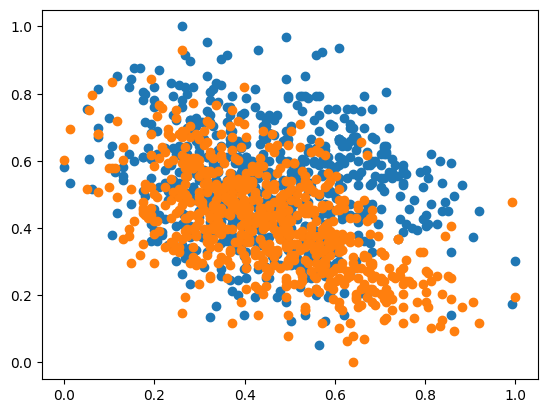

In [26]:
plt.scatter(x=training_set[:,0], y=training_set[:,1])
plt.scatter(x=training_set[:,0], y=training_set[:,2])

In [21]:
training_set.shape

(700, 4)

In [22]:
training_set[0,0]

0.3229813664596275

In [23]:
training_set[0,1]

0.4387096774193555

In [28]:
validation_set.shape

(300, 4)